# Посредник

Посредник -- поведенческий паттерн проектирования, который позволяет уменьшить связанность множества классов между собой, благодаря перемещению этих связей в один класс-посредник.

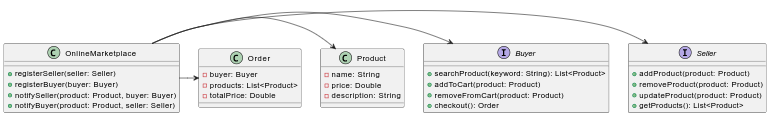

В данном примере система онлайн-торговли выступает в роли посредника между продавцами и покупателями. Продавцы могут зарегистрироваться на платформе и добавлять, удалять или обновлять свои товары. Покупатели могут искать товары по ключевым словам, добавлять их в корзину, оформлять заказы и производить оплату.

## Реализация в Python



Реализуем класс для магазина:

In [1]:
class OnlineMarketplace:
    def __init__(self):
        self.sellers = []
        self.buyers = []
        self.orders = []

    def registerSeller(self, seller):
        self.sellers.append(seller)

    def registerBuyer(self, buyer):
        self.buyers.append(buyer)

    def notifySeller(self, product, buyer):
        for seller in self.sellers:
            if product in seller.getProducts():
                seller.notify(product, buyer)

    def notifyBuyer(self, product, seller):
        for buyer in self.buyers:
            if product in buyer.getCart():
                buyer.notify(product, seller)


Реализуем классы для продавца и покупателя:

In [2]:
class Seller:
    def __init__(self, name):
        self.name = name
        self.products = []

    def addProduct(self, product):
        self.products.append(product)

    def removeProduct(self, product):
        self.products.remove(product)

    def updateProduct(self, product):
        for i, p in enumerate(self.products):
            if p.name == product.name:
                self.products[i] = product

    def getProducts(self):
        return self.products

    def notify(self, product, buyer):
        print(f"Dear {self.name}, your product {product.name} has been purchased by {buyer.name}.")

class Buyer:
    def __init__(self, name):
        self.name = name
        self.cart = []

    def searchProduct(self, keyword):
        results = []
        for seller in onlineMarketplace.sellers:
            for product in seller.getProducts():
                if keyword in product.name or keyword in product.description:
                    results.append(product)
        return results

    def addToCart(self, product):
        self.cart.append(product)

    def removeFromCart(self, product):
        self.cart.remove(product)

    def getCart(self):
        return self.cart

    def checkout(self):
        totalPrice = sum([product.price for product in self.cart])
        order = Order(self, self.cart, totalPrice)
        onlineMarketplace.orders.append(order)
        return order

    def notify(self, product, seller):
        print(f"Dear {self.name}, your order for {product.name} from {seller.name} has been processed.")



Реализуем классы для продукта и заказа:

In [3]:
class Product:
    def __init__(self, name, price, description):
        self.name = name
        self.price = price
        self.description = description

class Order:
    def __init__(self, buyer, products, totalPrice):
        self.buyer = buyer
        self.products = products
        self.totalPrice = totalPrice

onlineMarketplace = OnlineMarketplace()

Реализуем примеры использования:

In [6]:
onlineMarketplace = OnlineMarketplace()

seller1 = Seller("John")
seller2 = Seller("Mary")
onlineMarketplace.registerSeller(seller1)
onlineMarketplace.registerSeller(seller2)

product1 = Product("iPhone", 999.99, "The latest iPhone model.")
product2 = Product("MacBook", 1499.99, "The newest MacBook with Retina display.")
seller1.addProduct(product1)
seller2.addProduct(product2)

buyer1 = Buyer("Alice")
buyer2 = Buyer("Bob")
onlineMarketplace.registerBuyer(buyer1)
onlineMarketplace.registerBuyer(buyer2)

results = buyer1.searchProduct("iPhone")
buyer1.addToCart(results[0])
order1 = buyer1.checkout()
onlineMarketplace.notifySeller(product1, buyer1)
onlineMarketplace.notifyBuyer(product1, seller1)

Dear John, your product iPhone has been purchased by Alice.
Dear Alice, your order for iPhone from John has been processed.
